In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [49]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_ori=train.copy()
test_ori=test.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [51]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
## checking for null values

In [54]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
 test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* There are 687 null values in train data in cabin column- as more than 75% data is null we can drop this feature
* There are 177 null values of age in train data - we can replace those with meadian value of age
* There are only 2 null values of Embarked we can replace with Mode value of that respectively 

### survived vs not survived

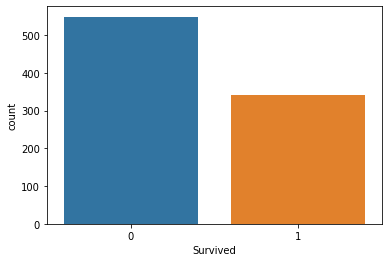

In [58]:
sns.countplot(train.Survived)

In [59]:
# almost 350 people survived in the train data

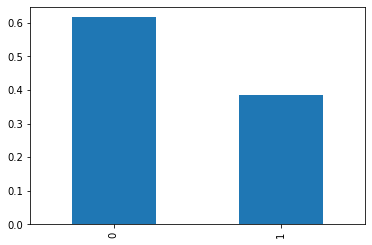

In [60]:
train.Survived.value_counts(normalize=True).plot(kind="bar")

* almost 39% passengers survived

### we will be doing EDA only on the Train data


* as we are doing only EDA we will Just replace the null values with median or mode respectively
* Too many null values in Cabin so we are droping it

In [61]:
train.drop("Cabin",axis=1,inplace=True)

In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [63]:
train["Age"]=train["Age"].replace(np.nan,train["Age"].median())

In [64]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* only 2 missing values in Embarked so we will replce it with S

In [65]:
train["Embarked"]=train["Embarked"].replace(np.nan,"S")

In [66]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* now we dont have any null values in the data 
* we have to check for outliers 

In [67]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [68]:
categorical=train.select_dtypes(["object"]).columns
numnerical=train.select_dtypes(["int64","float"]).columns

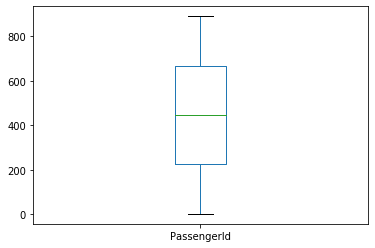

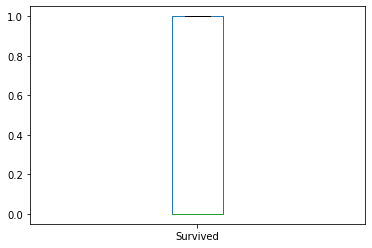

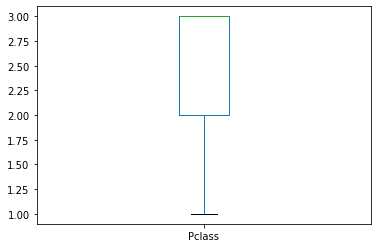

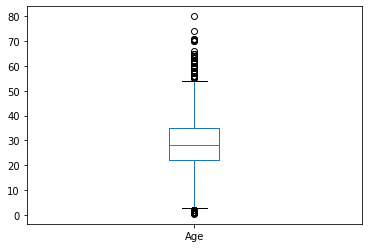

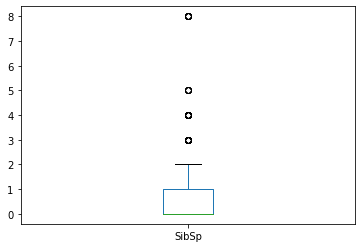

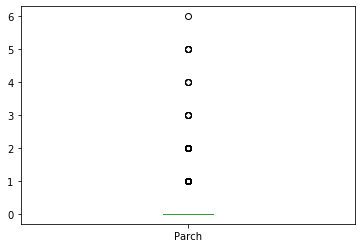

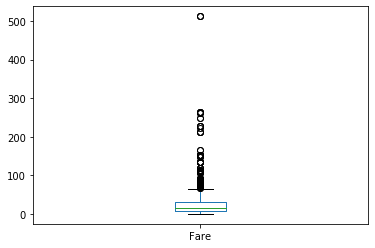

In [69]:
for i in numnerical:
    train[i].plot(kind="box")
    plt.show()

* we can see a few outliers in fare and age column

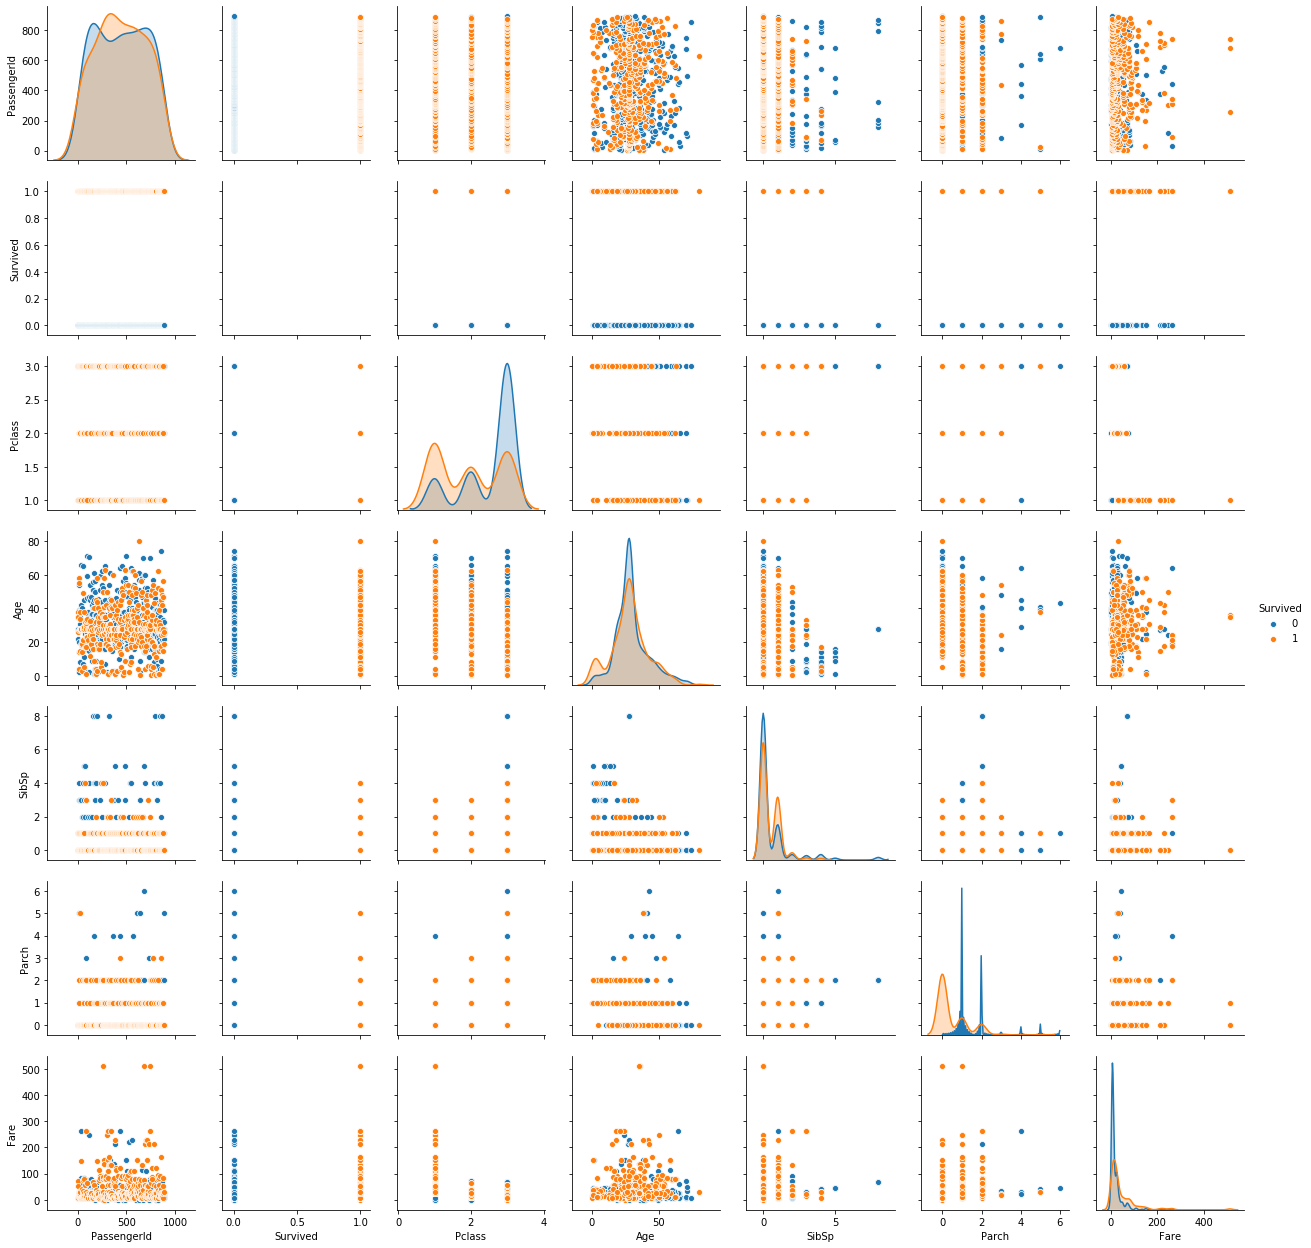

In [70]:
sns.pairplot(train,hue="Survived")
plt.show()

* we can drop PassengerId also - we cannot analyze anything on that feature

In [71]:
train.drop("PassengerId",axis=1,inplace=True)

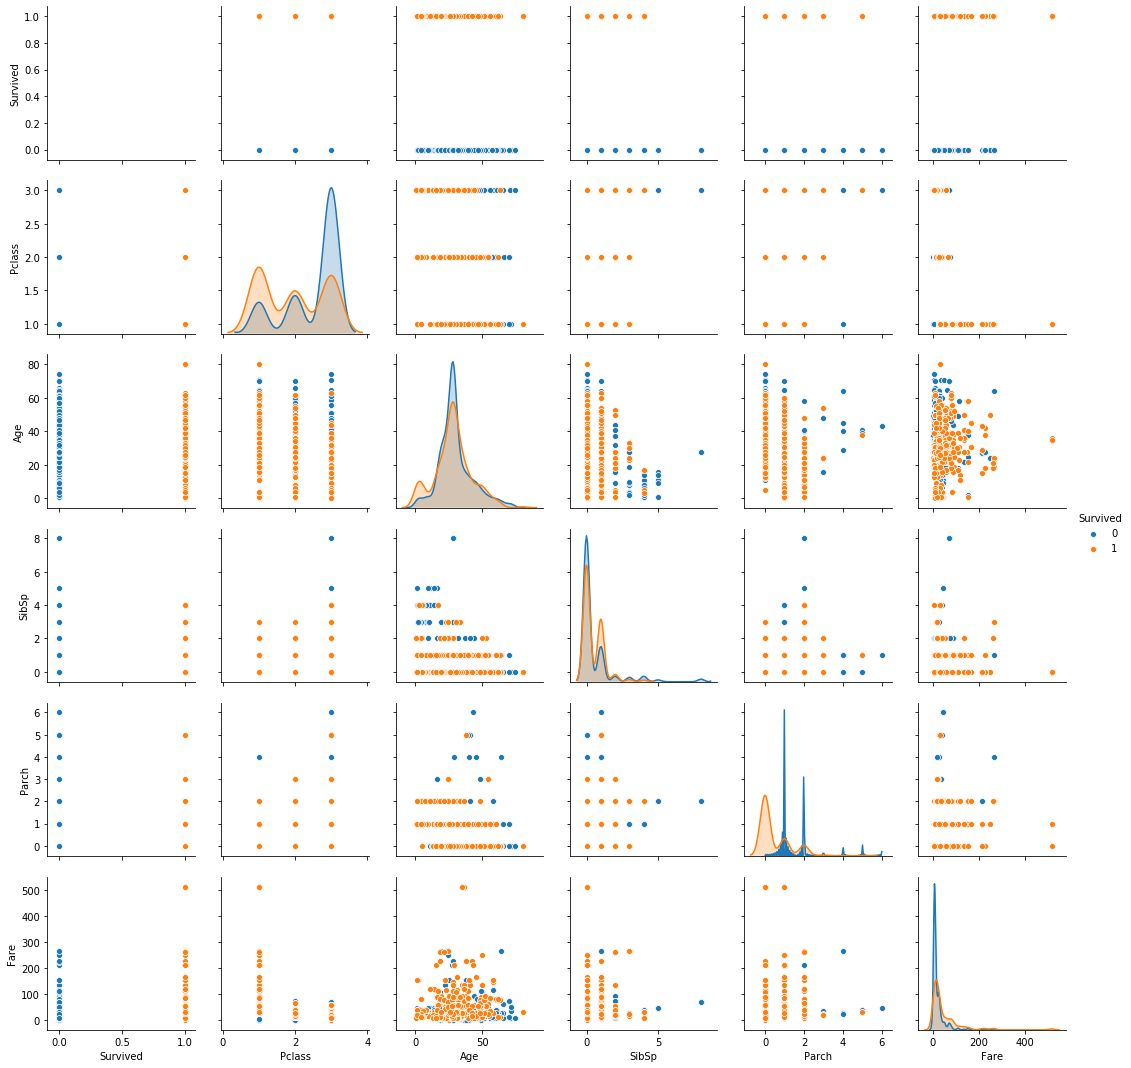

In [72]:
sns.pairplot(train,hue="Survived")
plt.show()

## Gender vs survival rate

In [73]:
Sur=pd.crosstab(train.Sex,train.Survived)

In [74]:
Sur

Survived,0,1
Sex,,
female,81,233
male,468,109


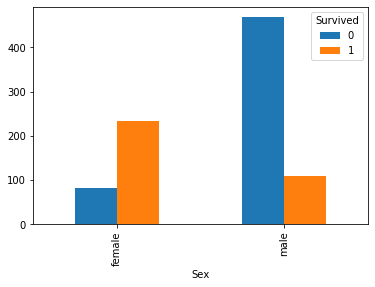

In [75]:
Sur.plot(kind="bar")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

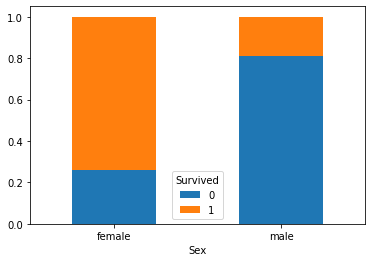

In [76]:
Sur.div(Sur.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)

* Female survived more when compared to male survival rate

### Total % of men and women survived

In [77]:
femsur=train[train.Sex == 'female'].Survived.sum()/train[train.Sex == 'female'].Survived.count()
malesur=train[train.Sex == 'male'].Survived.sum()/train[train.Sex == 'male'].Survived.count()

In [78]:
print("% of female survived",femsur)
print("% of male survived",malesur)

% of female survived 0.7420382165605095
% of male survived 0.18890814558058924


## Pclass Vs Survival rate

In [79]:
pl=pd.crosstab(train.Pclass,train.Survived)

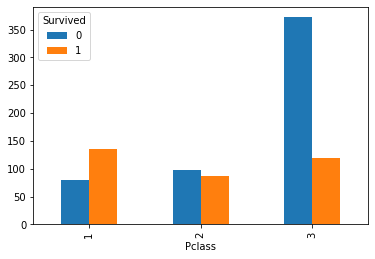

In [80]:
pl.plot(kind="bar")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

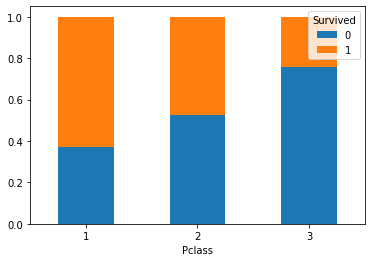

In [81]:
pl.div(pl.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xticks(rotation=0)

In [82]:
cla1=train[train.Pclass == 1].Survived.sum()/train[train.Pclass == 1].Survived.count()
cla2=train[train.Pclass == 2].Survived.sum()/train[train.Pclass == 2].Survived.count()
cla3=train[train.Pclass == 3].Survived.sum()/train[train.Pclass == 3].Survived.count()

In [83]:
print("class 1 survival rate: ",cla1)
print("class 2 survival rate: ",cla2)
print("class 3 survival rate: ",cla3)

class 1 survival rate:  0.6296296296296297
class 2 survival rate:  0.47282608695652173
class 3 survival rate:  0.24236252545824846


* Alomst 63% survival rate of passengers who belonged to class 1

### sex grouped by Pclass VS Survived

In [84]:
genclas=pd.crosstab([train.Sex, train.Pclass],train.Survived)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

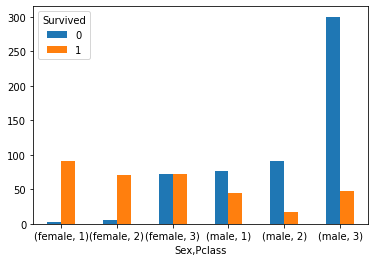

In [85]:
genclas.plot(kind="bar")
plt.xticks(rotation=0)

* male who belong to 3rd class survial rate is very low 
* female who belonged to 1st and 2nd class have very high survival rate
* female of 3rd class have 50% chance of surviving and not surviving

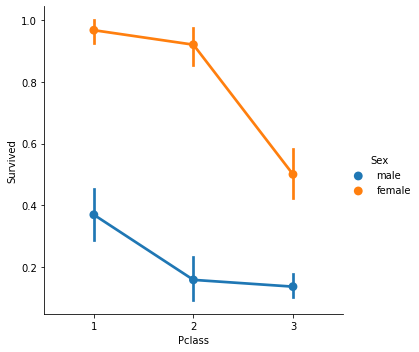

In [39]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=train,kind='point')

##### from the above plot we can clearly see that female of class 1 and 2 have more than 90% chance of surviving while female of class 3 has only 50% survival rate
##### male of class 1 have 40% suvival rate but class 2 & 3 male have less than 15% survival rate

### SibSp Vs Survived

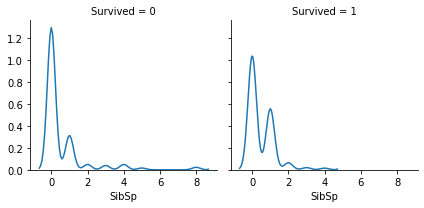

In [86]:
g=sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'SibSp', hist=False, rug=False)


In [87]:
train[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


##### people who were alone  Vs people with sibilings

In [88]:
alone = train[(train['SibSp'] == 0) & (train['Parch']==0)]
not_alone= train[(train['SibSp'] != 0) & (train['Parch']!=0)]

In [92]:
print("total No of ppl who came without sibilings:",len(alone))
print("total No of ppl who came with sibilings:",len(not_alone))

total No of ppl who came without sibilings: 537
total No of ppl who came with sibilings: 142


In [132]:
pd.crosstab([train.SibSp],train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


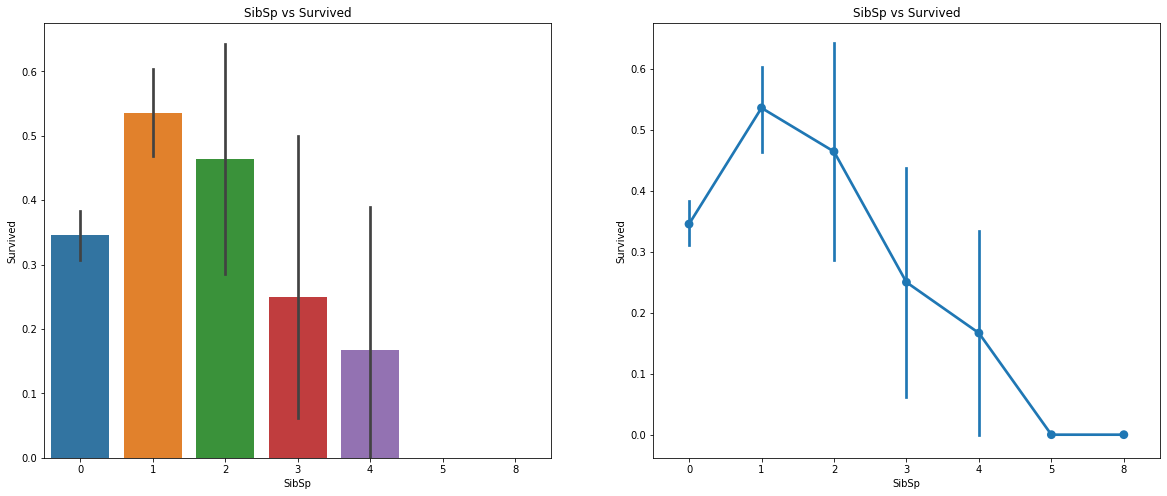

In [134]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

### Embarked Vs Pclass

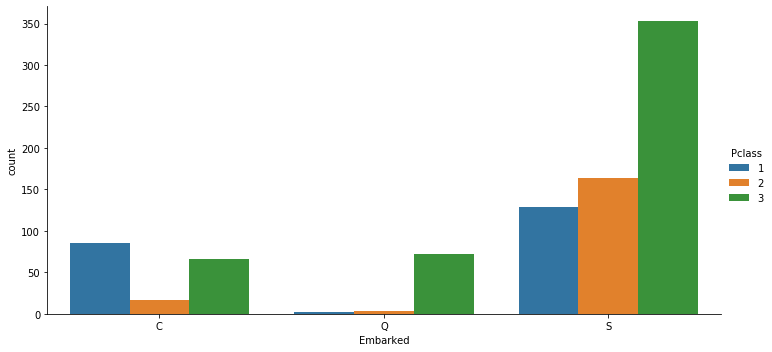

In [98]:
sns.factorplot('Embarked', data=train, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

In [99]:
count = pd.crosstab(index=[train.Pclass], columns=[train.Embarked])
count.columns = [['Cherbourg','Queenstown','Southampton']]
count

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,129
2,17,3,164
3,66,72,353


#### most number of passengers belong to 3rd class and are from Southampton

### Embarked vs Survived

In [101]:
emb=pd.crosstab(train.Embarked,train.Survived)
emb

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


   Tot_Emb  Percent_Emb  Tot_Sur  Percent_Sur
S      646    72.502806      219     0.339009
C      168    18.855219       93     0.553571
Q       77     8.641975       30     0.389610


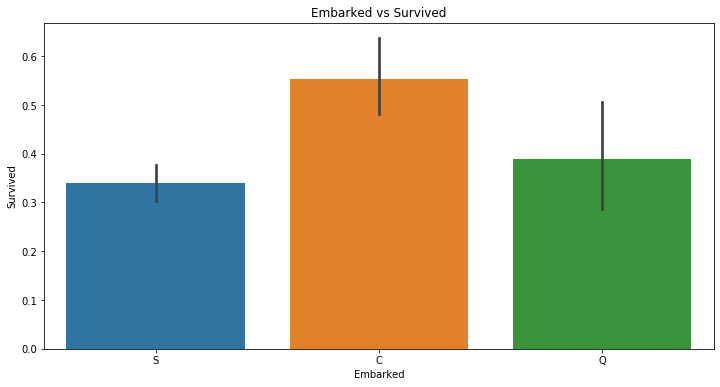

In [120]:
Embarked_tot = train.Embarked.value_counts(normalize=False,ascending=False,dropna=True)
Embarked_per = train.Embarked.value_counts(normalize=True,ascending=False,dropna=True)*100
Embarked_sur = pd.pivot_table(
    train,
    values='Survived',
    index='Embarked',
    #columns='Sex',
    aggfunc=np.sum,
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All')
Embarked_train = pd.concat([Embarked_tot,Embarked_per,Embarked_sur.Survived, Embarked_sur.Survived/Embarked_tot],
                           axis=1,
                           keys=['Tot_Emb', 'Percent_Emb','Tot_Sur', 'Percent_Sur'],
                           sort=True).sort_values('Tot_Emb',ascending=False)
print(Embarked_train)
#pal = {'S':"Red", 'C':"Green",'Q':'Blue'}

fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Embarked',
    y='Survived',
    #hue='Sex',
    data=train,
#palette=pal
)
ax.set_title('Embarked vs Survived')
plt.show()

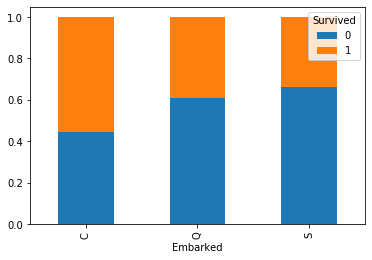

In [102]:
emb.div(emb.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

* Passengers from Queenstown have higher survival rate

### Embarked Grouped with age Vs Survived

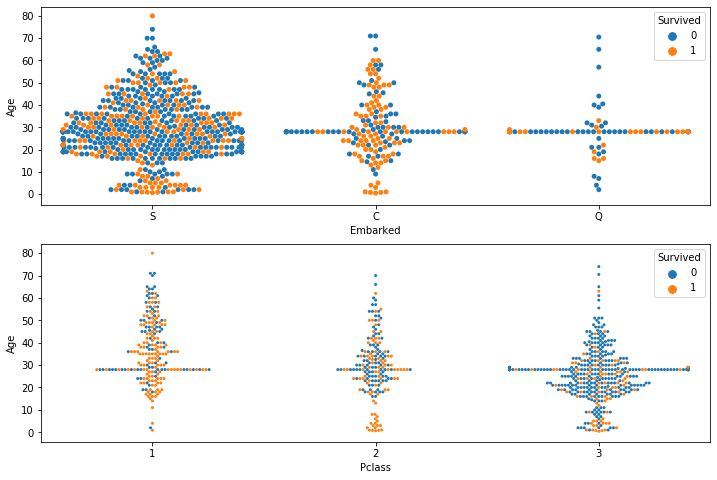

In [123]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
plt.subplot(2,1,1)
sns.swarmplot(x='Embarked', y='Age',hue='Survived', data=train)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.swarmplot(x='Pclass', y= 'Age', data=train,hue='Survived', size =3)

# Display the plot
plt.show()


* A lot of Class 1 people with Age < 20 have survived
* Particularly no new information

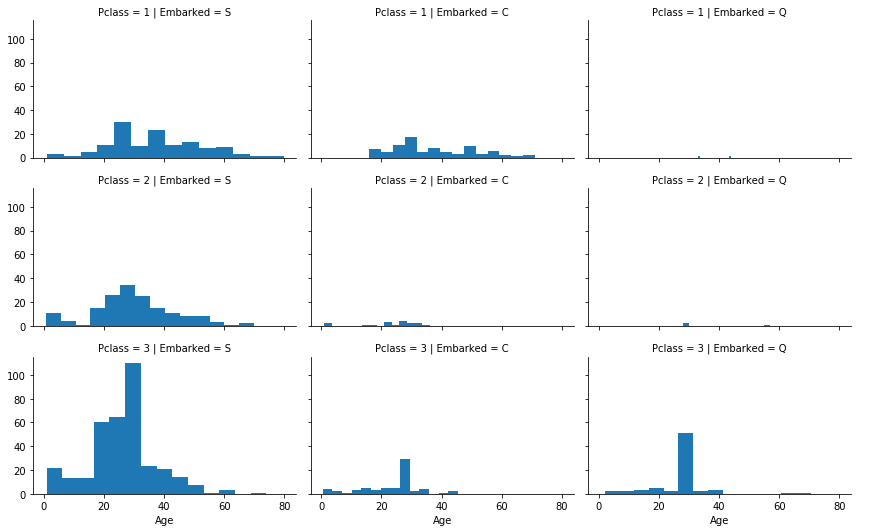

In [125]:
grid = sns.FacetGrid(train, row='Pclass', col = 'Embarked', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Age',bins =14)
grid.add_legend()
plt.show()

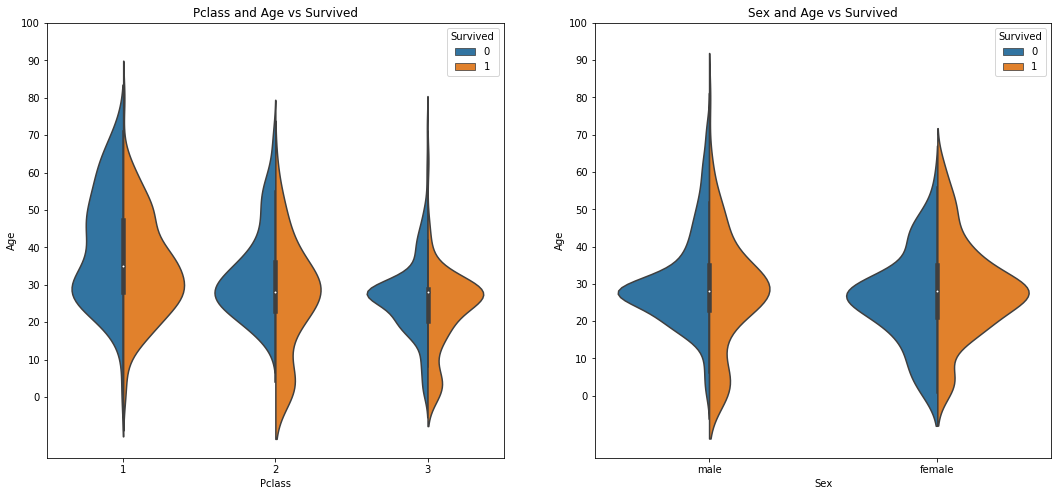

In [127]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

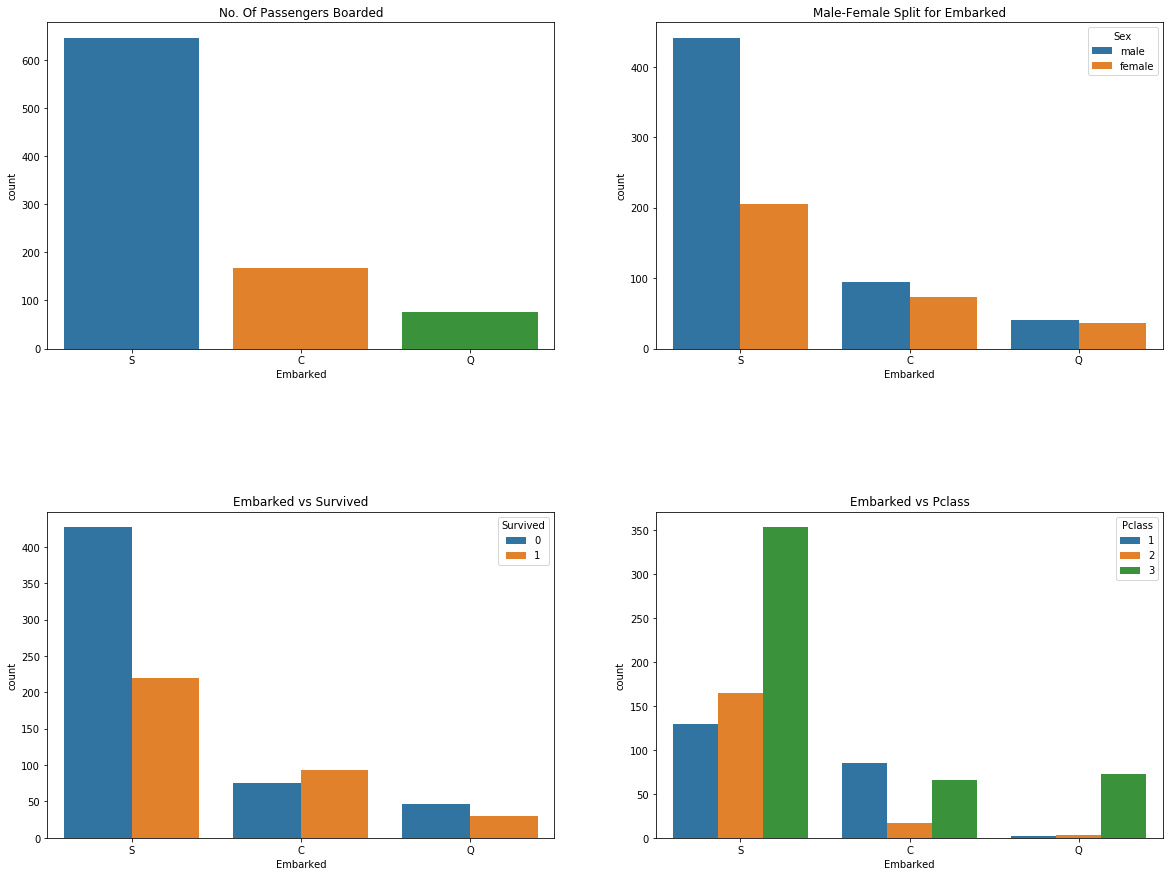

In [129]:

f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

* Maximum passenegers boarded from S. Majority of them being from Pclass3.
* The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
* Port Q had almost 95% of the passengers were from Pclass3.

### Parch Vs  PClass

In [136]:
pd.crosstab(train.Parch,train.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


* large portion of the family belong to class 3

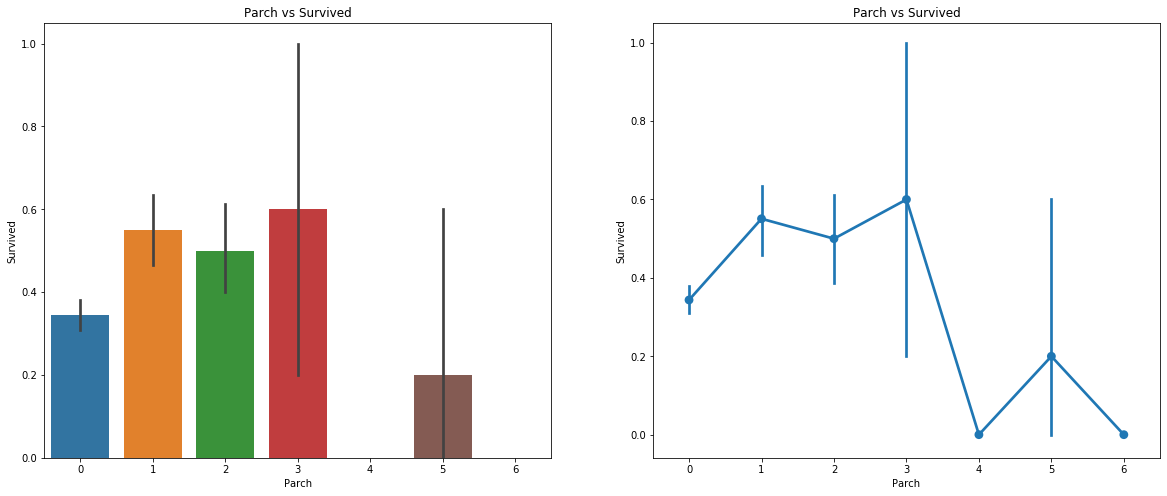

In [138]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

* Family of 3 members suvival rate is high

### Fare in Pclass

In [139]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


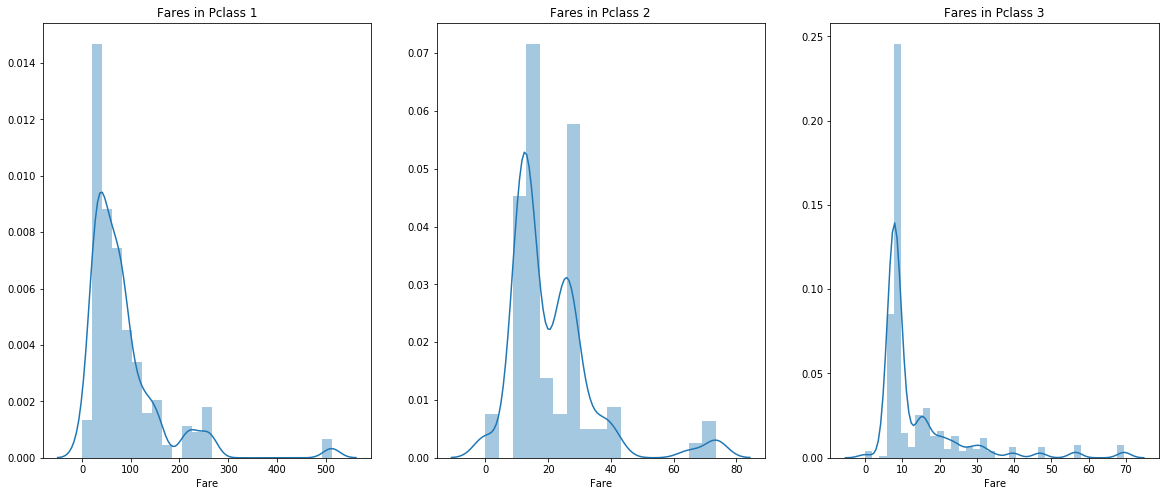

In [140]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

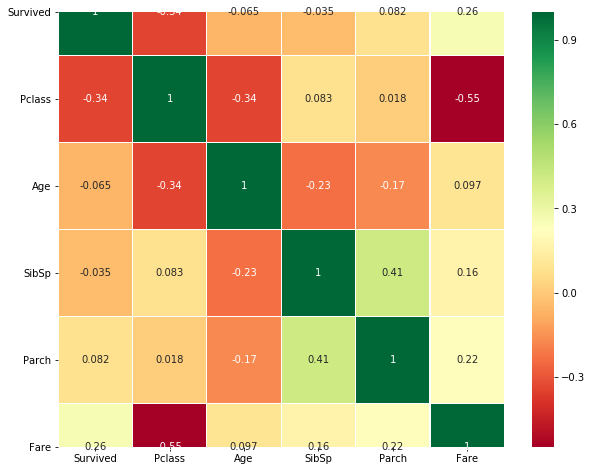

In [141]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

## Final obervation

**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.